<a href="https://colab.research.google.com/github/Dharinesh/WebPage-elements-Detector-using-Computer-Vison/blob/main/ui_elements_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [14]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
!pip install inference-sdk
from inference_sdk import InferenceHTTPClient
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Inference API call

In [15]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="sgJ1uFt2KIVd2uQvtNE7"
)

### Detecting Using the model for each image iteratively

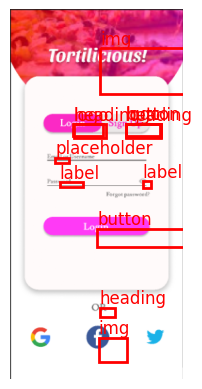

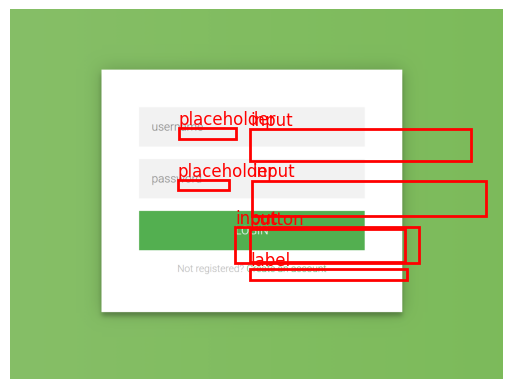

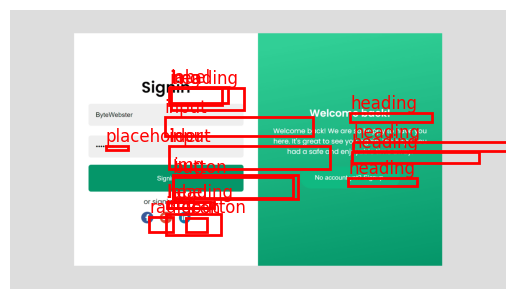

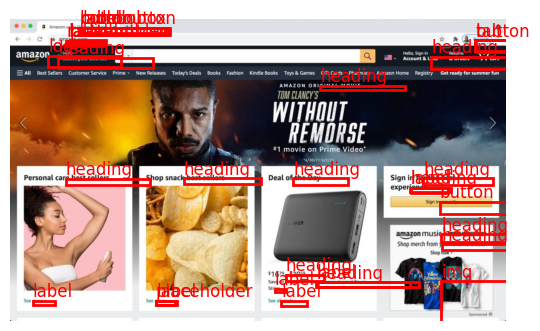

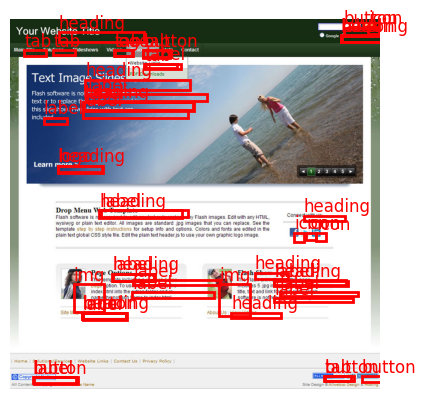

In [18]:
# Iterating through the images in the contents folder
image_paths = [f"/content/{i}.png" for i in range(1, 6)]

for image_path in image_paths:
    # Performing inference on each image
    result = CLIENT.infer(image_path, model_id="webform-elements-detection/10")

    # Loading the image
    image = plt.imread(image_path)

    # Creating figure and axis
    fig, ax = plt.subplots()

    # Displaying the image
    ax.imshow(image)

    # Plotting boxes around detected objects and their class
    for prediction in result['predictions']:
        x, y = prediction['x'], prediction['y']
        width, height = prediction['width'], prediction['height']
        class_name = prediction['class']

        # Creating a rectangle patch
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')

        # Adding the patch to the plot
        ax.add_patch(rect)

        # Adding class label to the plot
        ax.text(x, y, class_name, color='r', fontsize=12, ha='left', va='bottom')

    # Plotting
    plt.axis('off')
    plt.show()